# Two way partitioning problem

## Naive approach

In [565]:
import numpy as np

n = 10
W = 10*np.random.randn(n,n)
W = (W + W.T)/2

def brute_force_optimisation(W):
    n = W.shape[0]
    opt_obj = np.inf
    opt_x = np.inf * np.ones(n)
    elements = list(range(n))
    subsets = [[]]

    for el in elements:
        for i in range(len(subsets)):
            subsets += [subsets[i]+[el]]
            x = np.ones(n)
            x[subsets[-1]] = -1
            obj_val = x.T @ W @ x
            print(obj_val)
            if obj_val < opt_obj:
                opt_obj = obj_val
                opt_x = x

    return opt_obj, opt_x

In [541]:
from matplotlib import pyplot as plt
from tqdm.auto import tqdm
np.random.seed(1)
times = []

ns = list(range(1,20))

for n in tqdm(ns):
  W = np.random.randn(n,n)
  W = (W + W.T)/2
  
  res = %timeit -r 3 -n 3 -o -q brute_force_optimisation(W)

  times.append(res.average)

100%|██████████| 19/19 [00:58<00:00,  3.09s/it]


Estimated n, which will take universe lifetime is 61


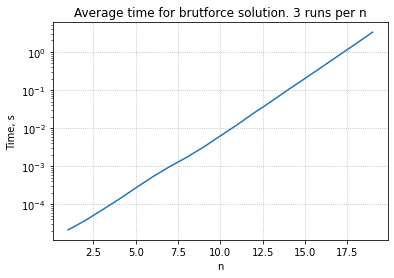

In [542]:
plt.semilogy(ns, times)
plt.xlabel('n')
plt.ylabel('Time, s')
plt.grid(True, ls=':')
plt.title('Average time for brutforce solution. 3 runs per n')
plt.savefig('lls_times.svg')
universe_lifetime = 4.4e17
n_exp = int(np.log(universe_lifetime)/(np.log(times[-1]) - np.log(times[0]))*(ns[-1] - ns[0]))
print(f"Estimated n, which will take universe lifetime is {n_exp}")
plt.savefig('partition_bruteforce.svg')

## Simple lower bound with duality

In [ ]:
from matplotlib import pyplot as plt
from tqdm.auto import tqdm
np.random.seed(1)
times = []

ns = list(range(1,20))

for n in tqdm(ns):
  W = np.random.randn(n,n)
  W = (W + W.T)/2
  
  res = %timeit -r 3 -n 3 -o -q brute_force_optimisation(W)

  times.append(res.average)

In [567]:
def simple_lower_bound(W):
    n = W.shape[0]
    return min(np.linalg.eig(W)[0])*n

opt_obj, _ = brute_force_optimisation(W)
lower_bound = simple_lower_bound(W)
print(f"opt {opt_obj:.2f}, bound {lower_bound:.2f}")

-65.87358426893415
-109.59538455825927
-126.9200181404762
104.09257089086114
46.278696031019976
-70.57446820995054
-103.74432160486982
-29.60559600418882
13.624432910648455
-102.9871169220915
-35.11306654233235
64.11469885550159
91.49950795763655
-98.24340582674881
-46.21457525969199
62.6610830728257
69.96204236303966
-98.3379037913521
-66.39292303621627
194.75332217494042
186.20906165245205
-55.22224845358511
-39.122487511151625
-50.06424251421743
42.43540073797263
-198.754294959834
-81.6106302427221
47.750791334931264
124.40521477441898
-189.91584487503303
-88.61739997062341
41.588681057957174
1.8929230675462847
-49.96948315002455
-65.0212196755136
185.80405605492834
130.2630782518151
5.26930808259886
-25.62764825559254
11.647910601762227
57.15083657332741
-67.60131918765829
2.5456282488287876
121.58608034576733
151.24378650463018
-46.639733208000905
7.661994415783806
125.2868438212155
134.86070016815734
-41.57985191448011
-7.361974102616376
273.5969578076449
267.3255943418844
17.753

## Optimal lower bound with cvxpy

In [566]:
import cvxpy as cp

def dual_problem_solution(W):
    n = W[0].shape
    nu = cp.Variable(n)
    obj = -np.ones(n).T @ nu
    constraints = [W + cp.diag(nu) >> 0]
    prob = cp.Problem(cp.Maximize(obj), constraints)
    prob.solve()
    return prob

p = dual_problem_solution(W)
print(f"{p.value:.2f}")

-250.25


In [558]:
p.value

-85.48416355840925